In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mlp
%matplotlib inline
mlp.rc('axes',labelsize=14)
mlp.rc('xtick',labelsize=12)
mlp.rc('ytick',labelsize=12)

In [3]:
np.random.seed(42)

In [4]:
(X_train, y_train),(X_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [5]:
(X_train.shape,y_train.shape)

((60000, 28, 28), (60000,))

In [5]:
x_training,x_valid=X_train[:5000]/255.0,X_train[5000:]/255.0
y_training,y_valid=y_train[:5000],y_train[5000:]

In [6]:
(x_training.shape,
x_valid.shape)

((5000, 28, 28), (55000, 28, 28))

In [7]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [8]:
model=keras.models.Sequential()

In [9]:
model.add(keras.layers.Flatten(input_shape=[28,28]))

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [12]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │           3,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301,020 (1.15 MB)

 Trainable params: 301,020 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [21]:
history=model.fit(x_training,y_training,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.9557 - loss: 0.1432 - val_accuracy: 0.8532 - val_loss: 0.5828
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.9693 - loss: 0.0966 - val_accuracy: 0.8533 - val_loss: 0.6005
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9694 - loss: 0.0962 - val_accuracy: 0.8532 - val_loss: 0.5936
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9753 - loss: 0.0848 - val_accuracy: 0.8541 - val_loss: 0.6081
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.9782 - loss: 0.0744 - val_accuracy: 0.8544 - val_loss: 0.6056
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9743 - loss: 0.0795 - val_accuracy: 0.8539 - val_loss: 0.6176
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.9793 - loss: 0.0773 - val_accuracy: 0.8539 - val_loss: 0.6247
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.9791 - loss: 0.0657 - val_acc

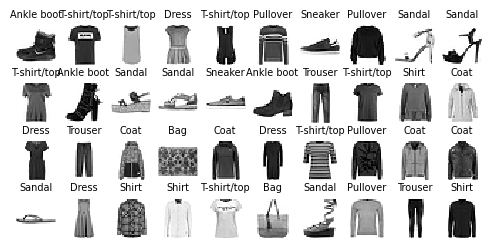

In [88]:
n_rows=4
n_cols=10
plt.figure(figsize=(n_rows*1.5,n_cols*0.3))
for i in range(n_rows):
    for j in range(n_cols):
        index=n_cols*i+j
        plt.subplot(n_rows,n_cols,index+1)
        plt.imshow(X_train[index],cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]],fontsize=7)
plt.subplots_adjust(wspace=0.2,hspace=0)
plt.show()

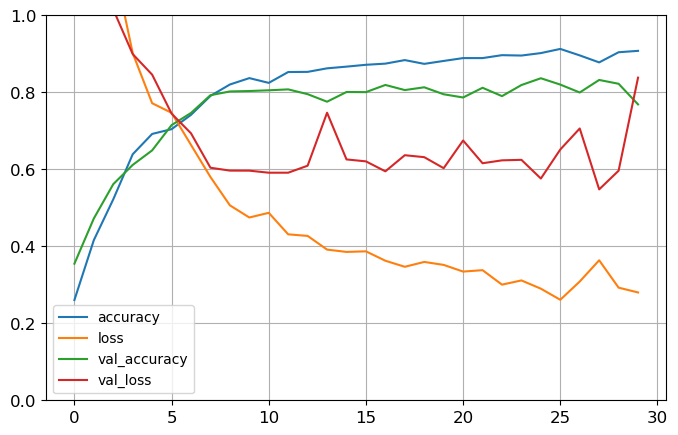

In [17]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [19]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4818 - loss: 3.3935


[3.488863706588745, 0.478300005197525]